In [9]:
from causalgraphicalmodels import cgm
import networkx as nx

In [2]:
casual_graph = """digraph {
Treatment;
dANB;
dPPPM;
dIMPA;
dCoA;
dGoPg;
dCoGo;
dT;
Growth;
Treatment -> dANB;
Treatment -> dCoA;
dT -> Growth;
dT -> dCoA;
dT -> dGoPg;
dT -> dCoGo;
Growth -> dANB;
Growth -> dCoGo;
dPPPM -> dCoA;
dPPPM -> dCoGo;
dANB -> dIMPA;
dANB -> dCoA;
dCoA -> dGoPg;
dCoA -> dCoGo;
}
"""

nodes = ["Treatment", "dANB", "dPPPM", "dIMPA", "dCoA", "dCoA", "dGoPg", "dCoGo", "dT", "Growth", "Un-observed"]
edges = [("Treatment", "dANB"),
         ("Treatment", "dCoA"),
         ("dT", "Growth"),
         ("dT", "dCoA"),
         ("dT", "dGoPg"),
         ("dT", "dCoGo"),
         ("Growth", "dANB"),
         ("Growth", "dCoGo"),
         ("dPPPM", "dCoA"),
         ("dPPPM", "dCoGo"),
         ("dANB", "dIMPA"),
         ("dANB", "dCoA"),
         ("dCoA", "dGoPg"),
         ("dCoA", "dCoGo"),
         ("Un-observed", "Treatment"),
         ("Un-observed", "dT")]
model = cgm.CausalGraphicalModel(nodes=nodes, edges=edges)

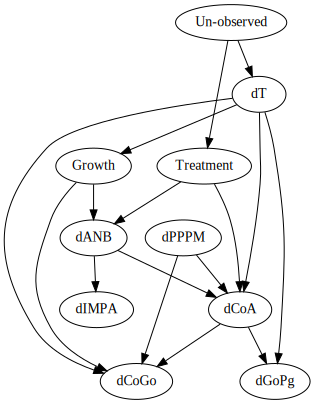

In [3]:
model.draw()

In [6]:
model.get_all_backdoor_paths("Treatment", "dANB")

[['Treatment', 'Un-observed', 'dT', 'Growth', 'dANB'],
 ['Treatment',
  'Un-observed',
  'dT',
  'Growth',
  'dCoGo',
  'dPPPM',
  'dCoA',
  'dANB'],
 ['Treatment', 'Un-observed', 'dT', 'Growth', 'dCoGo', 'dCoA', 'dANB'],
 ['Treatment', 'Un-observed', 'dT', 'dCoA', 'dANB'],
 ['Treatment',
  'Un-observed',
  'dT',
  'dCoA',
  'dPPPM',
  'dCoGo',
  'Growth',
  'dANB'],
 ['Treatment', 'Un-observed', 'dT', 'dCoA', 'dCoGo', 'Growth', 'dANB'],
 ['Treatment', 'Un-observed', 'dT', 'dGoPg', 'dCoA', 'dANB'],
 ['Treatment',
  'Un-observed',
  'dT',
  'dGoPg',
  'dCoA',
  'dPPPM',
  'dCoGo',
  'Growth',
  'dANB'],
 ['Treatment',
  'Un-observed',
  'dT',
  'dGoPg',
  'dCoA',
  'dCoGo',
  'Growth',
  'dANB'],
 ['Treatment', 'Un-observed', 'dT', 'dCoGo', 'dPPPM', 'dCoA', 'dANB'],
 ['Treatment', 'Un-observed', 'dT', 'dCoGo', 'dCoA', 'dANB'],
 ['Treatment', 'Un-observed', 'dT', 'dCoGo', 'Growth', 'dANB']]

In [15]:
model.get_all_backdoor_adjustment_sets("Treatment", 'dANB')

frozenset({frozenset({'Un-observed', 'dPPPM'}),
           frozenset({'Growth'}),
           frozenset({'Growth', 'dPPPM', 'dT'}),
           frozenset({'Un-observed'}),
           frozenset({'Growth', 'Un-observed'}),
           frozenset({'Growth', 'Un-observed', 'dPPPM'}),
           frozenset({'dT'}),
           frozenset({'Growth', 'Un-observed', 'dT'}),
           frozenset({'Growth', 'dPPPM'}),
           frozenset({'Un-observed', 'dT'}),
           frozenset({'dPPPM', 'dT'}),
           frozenset({'Un-observed', 'dPPPM', 'dT'}),
           frozenset({'Growth', 'dT'}),
           frozenset({'Growth', 'Un-observed', 'dPPPM', 'dT'})})

In all non-directed paths, we go through node "dT", so dT is obviously will be in adjustment set. The adjustment set for "dANB": {'dT', 'dPPPM', 'Growth'}

In [18]:
danb_set = set(['dT', 'dPPPM', 'Growth'])
model.is_valid_backdoor_adjustment_set("Treatment", "dANB", danb_set)

True

In [7]:
model.get_all_backdoor_paths("Treatment", "Growth")

[['Treatment', 'Un-observed', 'dT', 'Growth'],
 ['Treatment', 'Un-observed', 'dT', 'dCoA', 'dANB', 'Growth'],
 ['Treatment', 'Un-observed', 'dT', 'dCoA', 'dPPPM', 'dCoGo', 'Growth'],
 ['Treatment', 'Un-observed', 'dT', 'dCoA', 'dCoGo', 'Growth'],
 ['Treatment', 'Un-observed', 'dT', 'dGoPg', 'dCoA', 'dANB', 'Growth'],
 ['Treatment',
  'Un-observed',
  'dT',
  'dGoPg',
  'dCoA',
  'dPPPM',
  'dCoGo',
  'Growth'],
 ['Treatment', 'Un-observed', 'dT', 'dGoPg', 'dCoA', 'dCoGo', 'Growth'],
 ['Treatment',
  'Un-observed',
  'dT',
  'dCoGo',
  'dPPPM',
  'dCoA',
  'dANB',
  'Growth'],
 ['Treatment', 'Un-observed', 'dT', 'dCoGo', 'dCoA', 'dANB', 'Growth'],
 ['Treatment', 'Un-observed', 'dT', 'dCoGo', 'Growth']]

In [17]:
model.get_all_backdoor_adjustment_sets("Treatment", "Growth")

frozenset({frozenset({'Un-observed'}),
           frozenset({'Un-observed', 'dPPPM'}),
           frozenset({'dT'}),
           frozenset({'Un-observed', 'dT'}),
           frozenset({'dPPPM', 'dT'}),
           frozenset({'Un-observed', 'dPPPM', 'dT'})})

The optimal adjustment set for "Growth", as the most common causes: {'dT', 'dPPPM'}

In [ ]:
growth_set = ['dT', 'dPPPM']
model.is_valid_backdoor_adjustment_set("Treatment", "Growth", growth_set)

## ATE and ATET eval

In [23]:
from causalinference import CausalModel
import pandas as pd

In [24]:
df = pd.read_csv('malocclusion.csv')

In [26]:
cm_danb = CausalModel(
    Y=df['dANB'].values,
    D=df['Treatment'].values,
    X=df[['dT', "dPPPM", 'Growth']].values
)

In [44]:
cm_danb.est_via_ols()
print("ATE for dANB:", cm_danb.estimates['ols']['ate'])
print("ATET for dANB", cm_danb.estimates['ols']['att'])
## ATE dANB

ATE for dANB: 1.9209875146031348
ATET for dANB 2.0619409820718384


C:\Users\genho\miniconda3\envs\stat\lib\site-packages\causalinference\estimators\ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


In [40]:
cn_growth = CausalModel(
    Y=df['Growth'].values,
    D=df['Treatment'].values,
    X=df[['dT', 'dPPPM']].values
)

In [45]:
cn_growth.estimates

{'ols': {'ate': 0.20244082075082614, 'ate_se': 0.08659754999950695, 'atc': 0.18944453721688873, 'att': 0.2176031515404198, 'atc_se': 0.10091832837804536, 'att_se': 0.08443127675579667}}

In [42]:
cn_growth.est_via_ols()
print("ATE for Growth:", cn_growth.estimates['ols']['ate'])
print("ATET for Growth", cn_growth.estimates['ols']['att'])

ATE for Growth: 0.20244082075082614
ATET for Growth 0.2176031515404198


C:\Users\genho\miniconda3\envs\stat\lib\site-packages\causalinference\estimators\ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]
